In [28]:
import pandas as pd
import numpy as np

In [29]:
patients_df = pd.read_csv('mohs_patients_10000.csv')

In [30]:
patients_df

,PatientID,Complexity,TumorType,Location,TumorDiameter_mm,HistologicSubtype,SpeaksEnglish,Age,Immunosuppressed
0,Patient_00001,Simple,Basal Cell Carcinoma,Ear,5.5,Basosquamous,English,62,No
1,Patient_00002,Simple,Melanoma in situ,Forehead,8.8,Infiltrative,English,89,No
2,Patient_00003,Complex,Squamous Cell Carcinoma,Forehead,11.4,Desmoplastic,Non-English,50,No
3,Patient_00004,Simple,Melanoma in situ,Forehead,4.1,Desmoplastic,English,45,No
4,Patient_00005,Simple,Basal Cell Carcinoma,Ear,3.0,Superficial,English,66,No
...,...,...,...,...,...,...,...,...,...
9995,Patient_09996,Simple,Basal Cell Carcinoma,Forehead,7.4,Infiltrative,English,44,No
9996,Patient_09997,Complex,Basal Cell Carcinoma,Nose,9.3,Keratoacanthoma-like,English,82,No
9997,Patient_09998,Simple,Basal Cell Carcinoma,Neck,3.4,Keratoacanthoma-like,English,85,No
9998,Patient_09999,Simple,Basal Cell Carcinoma,Eyelid,5.1,Morpheaform,Non-English,56,Yes


In [31]:
patients_df['Complexity'].value_counts()

Complexity
Simple     7059
Complex    2941
Name: count, dtype: int64

**Seems to be fairly imbalanced, must take this into account when performing analysis**

Text(0.5, 1.0, 'Age Distribution')

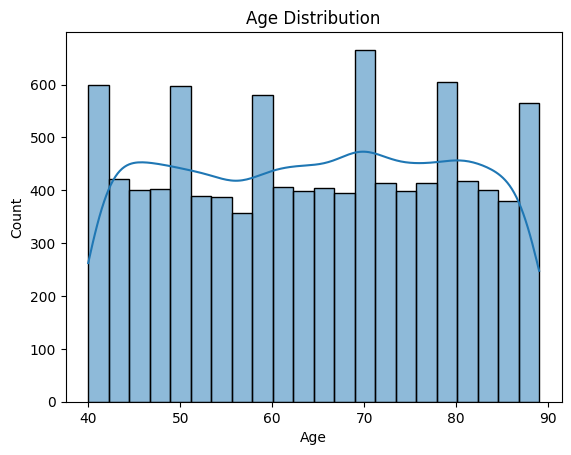

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Age distribution
sns.histplot(patients_df['Age'], kde=True)
plt.title('Age Distribution')

**Ages are fairly evenly distributed which is nice, allows us to use this as a variable without concerns of a skew.**

Text(0.5, 1.0, 'Age Distribution by Complexity')

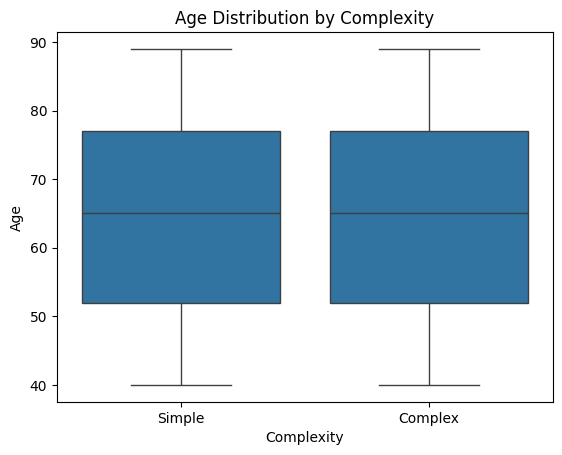

In [33]:
sns.boxplot(x='Complexity', y='Age', data=patients_df)
plt.title('Age Distribution by Complexity')

**I think this is due to it being simulated data... something to keep in mind when we get real data**

Text(0.5, 1.0, 'Tumor Diameter by Complexity')

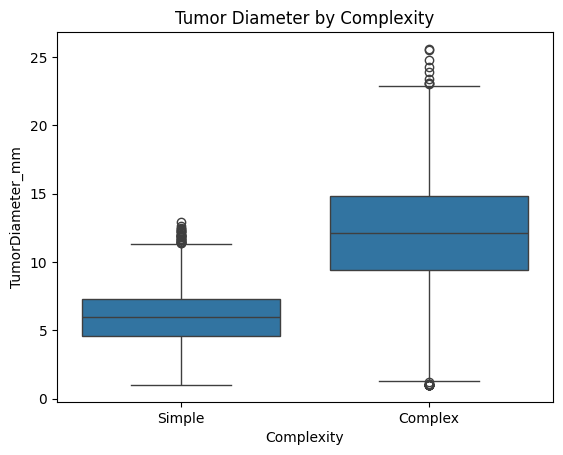

In [34]:
# Tumor Diameter by Complexity
sns.boxplot(x='Complexity', y='TumorDiameter_mm', data=patients_df)
plt.title('Tumor Diameter by Complexity')

**Larger tumor seems to be more complex - not groundbreaking since we could have assumed this, but good to confirm.**

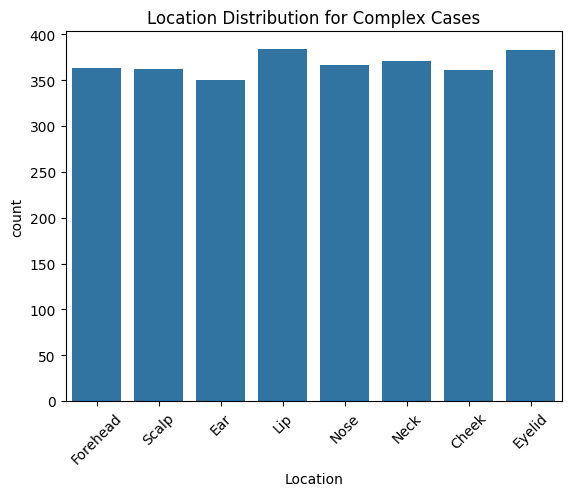

In [35]:
sns.countplot(data=patients_df[patients_df['Complexity'] == 'Complex'], x='Location')

plt.xticks(rotation=45)
plt.title('Location Distribution for Complex Cases')
plt.show()

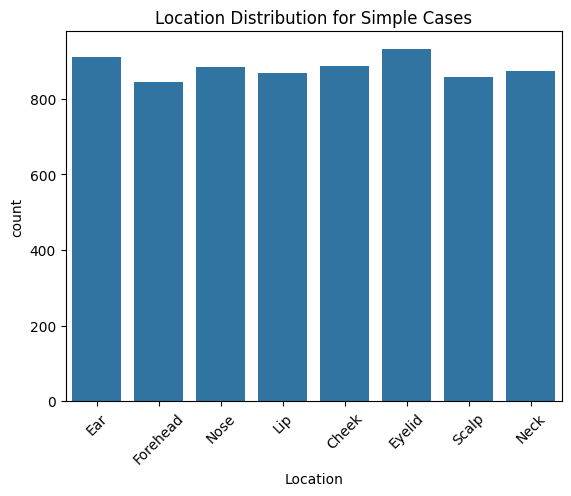

In [36]:
sns.countplot(data=patients_df[patients_df['Complexity'] == 'Simple'], x='Location')

plt.xticks(rotation=45)
plt.title('Location Distribution for Simple Cases')
plt.show()

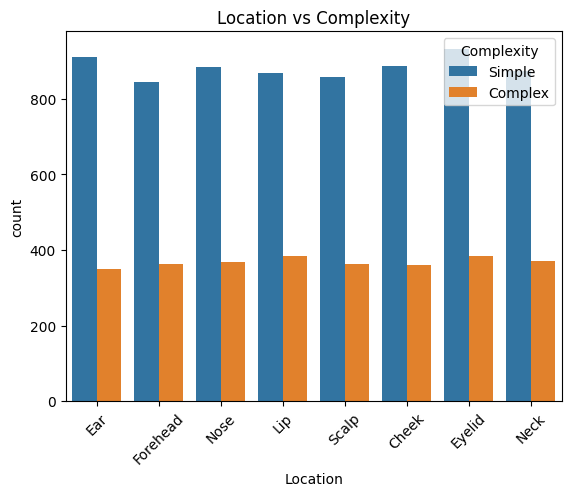

In [37]:
sns.countplot(data=patients_df, x='Location', hue='Complexity')
plt.xticks(rotation=45)
plt.title('Location vs Complexity')
plt.show()

**No clear difference between complex locations or between simple locations. Hard to tell differences in last bar graph since simple has so many more cases than complex.**

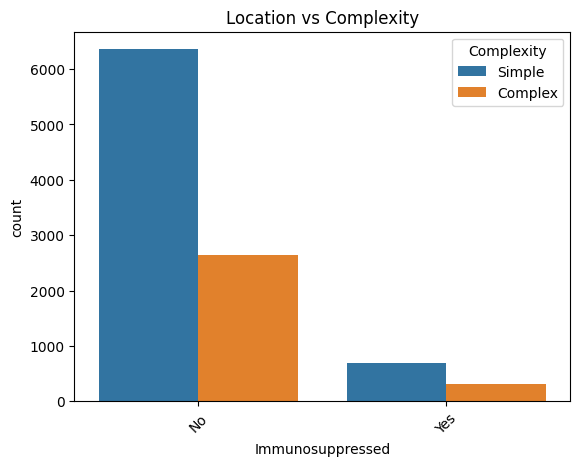

In [27]:
sns.countplot(data=patients_df, x='Immunosuppressed', hue='Complexity')
plt.xticks(rotation=45)
plt.title('Location vs Complexity')
plt.show()

**Honestly not helpful due to imbalance of classes - proportion would be better**

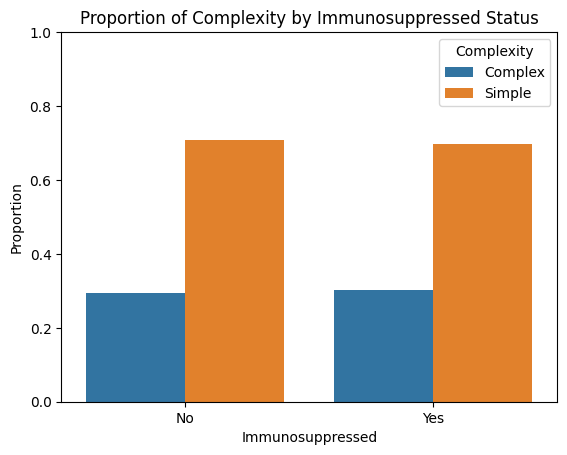

In [43]:
# Group and calculate proportions
counts = patients_df.groupby(['Immunosuppressed', 'Complexity']).size().reset_index(name='Count')

# Compute total per Immunosuppressed group
totals = counts.groupby('Immunosuppressed')['Count'].transform('sum')

# Add proportions column
counts['Proportion'] = counts['Count'] / totals

# Plot
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(data=counts, x='Immunosuppressed', y='Proportion', hue='Complexity')

plt.title('Proportion of Complexity by Immunosuppressed Status')
plt.ylabel('Proportion')
plt.ylim(0, 1)
plt.show()

<Axes: xlabel='count', ylabel='TumorType'>

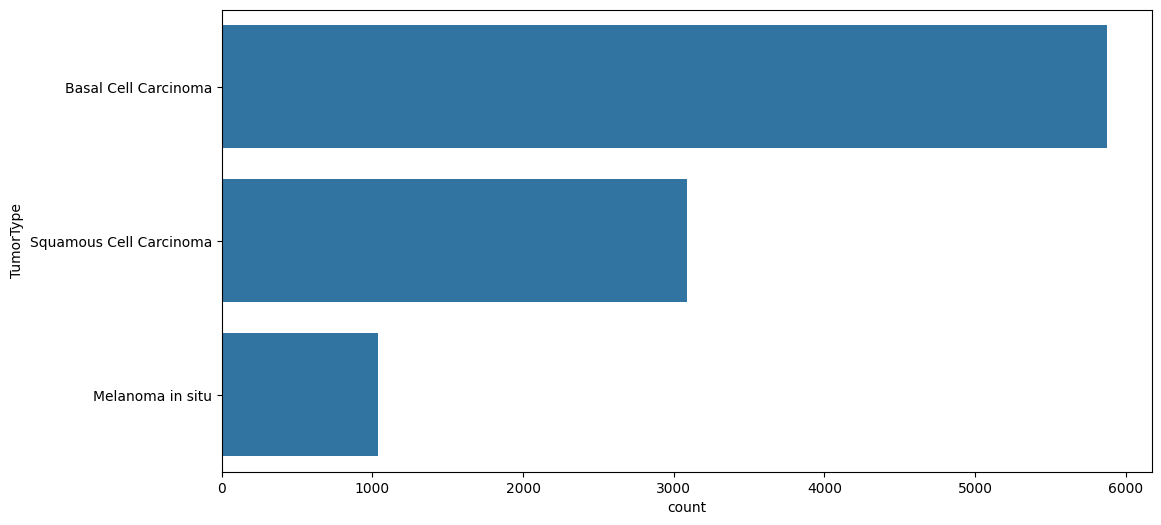

In [10]:
# Count of Tumor Types
plt.figure(figsize=(12,6))
sns.countplot(y='TumorType', data=patients_df, order=patients_df['TumorType'].value_counts().index)

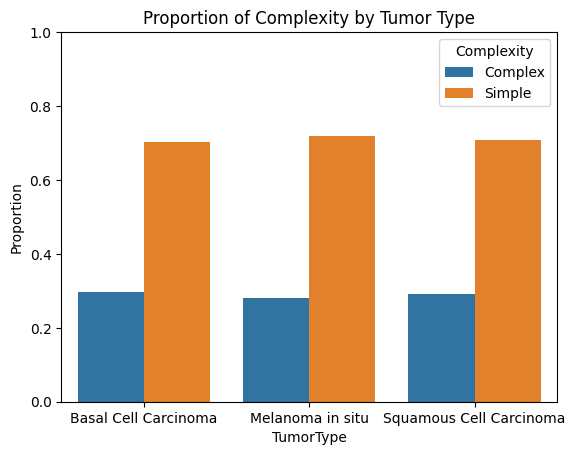

In [44]:
counts = patients_df.groupby(['TumorType', 'Complexity']).size().reset_index(name='Count')

# Compute total per Immunosuppressed group
totals = counts.groupby('TumorType')['Count'].transform('sum')

# Add proportions column
counts['Proportion2'] = counts['Count'] / totals

# Plot
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(data=counts, x='TumorType', y='Proportion2', hue='Complexity')

plt.title('Proportion of Complexity by Tumor Type')
plt.ylabel('Proportion')
plt.ylim(0, 1)
plt.show()